#Installing dependencies

In [ ]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))
    !nvidia-smi

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4
Thu Dec  8 10:12:01 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0    28W /  70W |      3MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                            

This notebook works fine with transformers 4.12, it is not tested on newer versions

In [ ]:
!pip install transformers==4.12.2
!pip install farasapy==0.0.14
!pip install pyarabic==0.6.14
!git clone https://github.com/aub-mind/arabert
!pip install emoji==1.6.1
!pip install sentencepiece==0.1.96

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 33.4 MB/s 
     |████████████████████████████████| 3.3 MB 58.3 MB/s 
     |████████████████████████████████| 182 kB 76.7 MB/s 
     |████████████████████████████████| 880 kB 45.3 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=e80e0e9dc0473c05e613ee96f32be3dc735f4a22be13d7eb960c284badaa2b29
  Stored in directory: /root/.cache/pip/wheels/82/ab/9b/c15899bf659ba74f623ac776e861cf2eb8608c1825ddec66a4
Successfully built sacremoses
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 126 kB 34.1 MB/s 
Cloning into 'arabert'...
remote: Enumerating objects: 600, done.
remote: Counting objects: 100% (65/65), done.
remo

#Creating training datasets

In [ ]:
import pandas as pd
import numpy as np
from typing import List
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import train_test_split

This custom dataset class will help us hold our datasets in a structred manner.
It's not necessary to use it with your own data

In [ ]:
class CustomDataset:
    def __init__(
        self,
        name: str,
        train: List[pd.DataFrame],
        test: List[pd.DataFrame],
        label_list: List[str],
    ):
        """Class to hold and structure datasets.

        Args:

        name (str): holds the name of the dataset so we can select it later
        train (List[pd.DataFrame]): holds training pandas dataframe with 2 columns ["text","label"]
        test (List[pd.DataFrame]): holds testing pandas dataframe with 2 columns ["text","label"]
        label_list (List[str]): holds the list  of labels
        """
        self.name = name
        self.train = train
        self.test = test
        self.label_list = label_list

In [ ]:
# This will hold all the downloaded and structred datasets
all_datasets= []
DATA_COLUMN = "text"
LABEL_COLUMN = "label"

You can choose which ever dataset you like or use your own.
At this stage we don't do any preprocessing on the text, this is done later when loading the text.

##LEVANTINE

In [ ]:
df_LV = pd.read_excel("/content/levantine.xlsx", header=0)

df_LV = df_LV[["Tweet", "Class"]]
df_LV.columns = [DATA_COLUMN, LABEL_COLUMN]
#df_LV = df_LV.drop(df_LV.loc[df_LV[LABEL_COLUMN]==0].sample(frac=0.40).index)

train_LV, test_LV = train_test_split(df_LV, test_size=0.25, random_state=42)

print(df_LV[LABEL_COLUMN].value_counts())
label_list_LV = list(df_LV[LABEL_COLUMN].unique())

data_LV = CustomDataset("LV", train_LV, test_LV, label_list_LV)
all_datasets.append(data_LV)

0    3650
1    2196
Name: label, dtype: int64


##araCOVID

In [ ]:
df_DZ = pd.read_excel("/content/aracovid.xlsx", header=0)


df_DZ = df_DZ[["Tweet", "Class"]]
df_DZ.columns = [DATA_COLUMN, LABEL_COLUMN]
df_DZ = df_DZ.drop(df_DZ.loc[df_DZ[LABEL_COLUMN]==0].sample(frac=0.68).index)

train_DZ, test_DZ = train_test_split(df_DZ, test_size=0.25, random_state=42)


print(df_DZ[LABEL_COLUMN].value_counts())
label_list_DZ = list(df_DZ[LABEL_COLUMN].unique())

data_DZ = CustomDataset("DZ", train_DZ, test_DZ, label_list_DZ)
all_datasets.append(data_DZ)



0    2676
1     823
Name: label, dtype: int64


In [ ]:
print(label_list_DZ)
print(df_DZ.isnull().sum().sum())

[1, 0]
0


In [ ]:
df_DZ = df_DZ.drop(df_DZ.loc[df_DZ[LABEL_COLUMN]==0].sample(frac=0.67).index)

In [ ]:
print(df_DZ[LABEL_COLUMN].value_counts())
label_list_DZ = list(df_DZ[LABEL_COLUMN].unique())

0    2759
1     823
Name: label, dtype: int64


## Multi-lingual

In [ ]:
df_ML = pd.read_excel("/content/multi.xlsx", header=0)

df_ML = df_ML[["Tweet", "Class"]]
df_ML.columns = [DATA_COLUMN, LABEL_COLUMN]

train_ML, test_ML = train_test_split(df_ML, test_size=0.2, random_state=42)

print(df_ML[LABEL_COLUMN].value_counts())
label_list_ML = list(df_ML[LABEL_COLUMN].unique())

data_ML = CustomDataset("ML", train_ML, test_ML, label_list_ML)
all_datasets.append(data_ML)

0    2879
1    1742
Name: label, dtype: int64


In [ ]:
print(label_list_ML)

[1, 0]


## Nuha

In [ ]:
df_NH = pd.read_excel("/content/nuha.xlsx", header=0)

df_NH = df_NH[["Tweet", "Class"]]
df_NH.columns = [DATA_COLUMN, LABEL_COLUMN]

train_NH, test_NH = train_test_split(df_NH, test_size=0.2, random_state=42)

print(df_NH[LABEL_COLUMN].value_counts())
label_list_NH = list(df_NH[LABEL_COLUMN].unique())

data_NH = CustomDataset("NH", train_NH, test_NH, label_list_NH)
all_datasets.append(data_NH)

0    2221
1    1559
Name: label, dtype: int64


In [ ]:
print(label_list_NH)

[0, 1]


## Raghad


In [ ]:
df_R = pd.read_excel("/content/raghad_total.xlsx", header=0)

df_R = df_R[["Tweet", "Class"]]
df_R.columns = [DATA_COLUMN, LABEL_COLUMN]

train_R, test_R = train_test_split(df_R, test_size=0.25, random_state=42)

print(df_R[LABEL_COLUMN].value_counts())
label_list_R = list(df_R[LABEL_COLUMN].unique())

data_R = CustomDataset("R", train_R, test_R, label_list_R)
all_datasets.append(data_R)

0    3518
1    1271
Name: label, dtype: int64


## SB

In [ ]:
df_S = pd.read_excel("/content/sb.xlsx", header=0)

df_S = df_S[["Tweet", "Class"]]
df_S.columns = [DATA_COLUMN, LABEL_COLUMN]

train_S, test_S = train_test_split(df_S, test_size=0.25, random_state=42)

print(df_S[LABEL_COLUMN].value_counts())
label_list_S = list(df_S[LABEL_COLUMN].unique())

data_S = CustomDataset("S", train_S, test_S, label_list_S)
all_datasets.append(data_S)

0    2159
1     922
Name: label, dtype: int64


## Total

In [ ]:
df_T = pd.read_csv("/content/total.csv", header=0)

df_T['Tweet'] = df_T['Tweet'].astype(str)
df_T['Class'] = df_T['Class'].astype(int32)

df_T = df_T[["Tweet", "Class"]]
df_T.columns = [DATA_COLUMN, LABEL_COLUMN]

train_T, test_T = train_test_split(df_T, test_size=0.2, random_state=42)

print(df_T[LABEL_COLUMN].value_counts())
label_list_T = list(df_T[LABEL_COLUMN].unique())

data_T = CustomDataset("T", train_T, test_T, label_list_T)
all_datasets.append(data_T)

0    22789
1    10951
Name: label, dtype: int64


In [ ]:
print(label_list_T)

#Trainer

Start the training procedure

In [ ]:
import numpy as np
import torch
import random
import matplotlib.pyplot as plt
import copy

from arabert.preprocess import ArabertPreprocessor
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, f1_score, precision_score,
                             recall_score)
from torch.utils.data import DataLoader, Dataset
from transformers import (AutoConfig, AutoModelForSequenceClassification,
                          AutoTokenizer, BertTokenizer, Trainer,
                          TrainingArguments)
from transformers.data.processors.utils import InputFeatures

List all the datasets we have

In [ ]:
for x in all_datasets:
  print(x.name)

T


In [ ]:
# select a dataset
dataset_name = 'T'
# select a model from the huggingface modelhub https://huggingface.co/models?language=ar
model_name = 'aubmindlab/bert-base-arabertv02-twitter' # we are going to use the twitter AraBERT since it has emojis and dialects

In [ ]:
for d in all_datasets:
  if d.name==dataset_name:
    selected_dataset = copy.deepcopy(d)
    print('Dataset found')
    break

Dataset found


Create and apply preprocessing using the AraBERT processor

In [ ]:
arabic_prep = ArabertPreprocessor(model_name)

selected_dataset.train[DATA_COLUMN] = selected_dataset.train[DATA_COLUMN].apply(lambda x: arabic_prep.preprocess(x))
selected_dataset.test[DATA_COLUMN] = selected_dataset.test[DATA_COLUMN].apply(lambda x: arabic_prep.preprocess(x))  

In [ ]:
# Sanity check on the dataset
list(selected_dataset.train[DATA_COLUMN][0:10])

['دعونا باسم الضحايا الذي قتلهم النازي الارزدكسي فلادميربوتين ان نرسل بصقة جيدة لمسيح هذا الواطي السفاح فلادمير بوتين ونذكر العالم واصحاب الضمير بمايرتكبه من جرائم هذا الارهابي المسيحي الارزدكسي فلادمير بوتين بحق السورين الاحرار الذين خرجوا لاسقاط عمليهم الواطي العلوي بشارالاسد',
 'الحب ، ا أ أ اخواني إن ، اللهم إني استودعتك إياهم ♥',
 'الدنمارك تعدم 17 مليون حيوان من فصيلة Mink ( المنك ) لثبوت حمله لسلالة جديدة معقدة من فايروس كورونا . . 🤦 \u200d ♂ P . s : المنك مصدر لملابس الفرو [رابط]',
 '# كورونا _ السعودية أنا عصام النصر أعلن تطوعي في سبيل الله للعمل لخدمة الشعب السعودي والوطن في حال إستدعت الظروف أي عمل تطوعي مهما كان فيه مصلحة عامة وخصوصا إذا دخلت السعودية لا قدر الله مرحلة الحجر الصحي المنزلي أنا متطوع إذا إحتاج الامريد عاملة لتوزيع حاجيات المواطنين .',
 'اللهم اغفر لنا خطايانا وجهلنا وإسرافنا في أمرنا وما أنت أعلم به منا اللهم اغفر لنا هزلنا وجدنا وخطايانا وعمدنا واللهم إغفر زلاتنا 🙏 🏻 # COVID2019 # ميثاق _ العزل _ المنزلي # فيروس _ كورونا',
 '[مستخدم] [مستخدم] [مستخدم] [مستخد

Now we need to check the tokenized sentence length to decide on the maximum sentence length value

In [ ]:
tok = AutoTokenizer.from_pretrained(model_name)

Downloading:   0%|          | 0.00/476 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/733k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.19M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Training Sentence Lengths: 


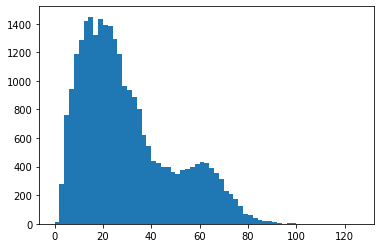

Testing Sentence Lengths: 


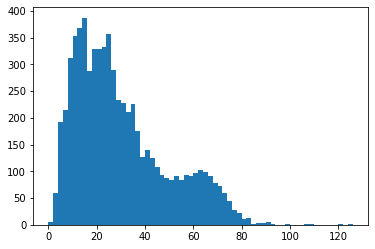

In [ ]:
print("Training Sentence Lengths: ")
plt.hist([ len(tok.tokenize(sentence)) for sentence in selected_dataset.train[DATA_COLUMN].to_list()],bins=range(0,128,2))
plt.show()

print("Testing Sentence Lengths: ")
plt.hist([ len(tok.tokenize(sentence)) for sentence in selected_dataset.test[DATA_COLUMN].to_list()],bins=range(0,128,2))
plt.show()

Let's select 100 as our maximum sentence length, and check how many sequences will be truncated

In [ ]:
max_len = 128

In [ ]:
print("Truncated training sequences: ", sum([len(tok.tokenize(sentence)) > max_len for sentence in selected_dataset.test[DATA_COLUMN].to_list()]))

print("Truncated testing sequences: ", sum([len(tok.tokenize(sentence)) > max_len for sentence in selected_dataset.test[DATA_COLUMN].to_list()]))

Truncated training sequences:  1
Truncated testing sequences:  1


Now let's create a classification dataset to load the data

In [ ]:
class ClassificationDataset(Dataset):
    def __init__(self, text, target, model_name, max_len, label_map):
      super(ClassificationDataset).__init__()
      """
      Args:
      text (List[str]): List of the training text
      target (List[str]): List of the training labels
      tokenizer_name (str): The tokenizer name (same as model_name).
      max_len (int): Maximum sentence length
      label_map (Dict[str,int]): A dictionary that maps the class labels to integer
      """
      self.text = text
      self.target = target
      self.tokenizer_name = model_name
      self.tokenizer = AutoTokenizer.from_pretrained(model_name)
      self.max_len = max_len
      self.label_map = label_map
      

    def __len__(self):
      return len(self.text)

    def __getitem__(self,item):
      text = str(self.text[item])
      text = " ".join(text.split())
        
      inputs = self.tokenizer(
          text,
          max_length=self.max_len,
          padding='max_length',
          truncation=True
      )      
      return InputFeatures(**inputs,label=self.label_map[self.target[item]])

In [ ]:
label_map = { v:index for index, v in enumerate(selected_dataset.label_list) }
print(label_map)

train_dataset = ClassificationDataset(
    selected_dataset.train[DATA_COLUMN].to_list(),
    selected_dataset.train[LABEL_COLUMN].to_list(),
    model_name,
    max_len,
    label_map
  )
test_dataset = ClassificationDataset(
    selected_dataset.test[DATA_COLUMN].to_list(),
    selected_dataset.test[LABEL_COLUMN].to_list(),
    model_name,
    max_len,
    label_map
  )

{0: 0, 1: 1}


Check the dataset output

In [ ]:
print(next(iter(train_dataset)))

InputFeatures(input_ids=[2, 26725, 1585, 7326, 425, 42329, 29005, 33181, 196, 1069, 193, 3045, 5227, 12145, 307, 338, 13457, 454, 1341, 370, 4102, 4777, 4165, 434, 1499, 1218, 54495, 3045, 5227, 7899, 53065, 619, 24005, 19845, 1199, 9682, 49251, 306, 6288, 434, 24713, 9753, 33181, 196, 1069, 193, 3045, 5227, 7899, 3897, 1712, 186, 37638, 860, 21965, 53995, 10734, 336, 1499, 1218, 17228, 4761, 3902, 3108, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], attention_mask=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Create a function that return a pretrained model ready to do classification

In [ ]:
def model_init():
    return AutoModelForSequenceClassification.from_pretrained(model_name, return_dict=True, num_labels=len(label_map))

Define whatever metric you want here

In [ ]:
def compute_metrics(p): #p should be of type EvalPrediction
  preds = np.argmax(p.predictions, axis=1)
  assert len(preds) == len(p.label_ids)
  print(classification_report(p.label_ids,preds))
  print(confusion_matrix(p.label_ids,preds))
  macro_f1 = f1_score(p.label_ids,preds,average='macro')
  macro_precision = precision_score(p.label_ids,preds,average='macro')
  macro_recall = recall_score(p.label_ids,preds,average='macro')
  acc = accuracy_score(p.label_ids,preds)
  return {       
      'macro_f1' : macro_f1,
      'accuracy': acc
  }

In [ ]:
def set_seed(seed=42):
  random.seed(seed)
  np.random.seed(seed)
  torch.manual_seed(seed)
  torch.cuda.manual_seed(seed)
  torch.cuda.manual_seed_all(seed)
  torch.backends.cudnn.deterministic=True
  torch.backends.cudnn.benchmark = False

#Regular Training

Define our training parameters.
Check the TrainingArguments documentation for more options https://huggingface.co/transformers/main_classes/trainer.html#trainingarguments

In [ ]:
training_args = TrainingArguments( 
    output_dir= "./train",    
    adam_epsilon = 1e-8,
    learning_rate = 2e-5,
    fp16 = True, # enable this when using V100 or T4 GPU
    per_device_train_batch_size = 16, # up to 64 on 16GB with max len of 128
    per_device_eval_batch_size = 128,
    gradient_accumulation_steps = 2, # use this to scale batch size without needing more memory
    num_train_epochs= 2,
    warmup_ratio = 0,
    do_eval = True,
    evaluation_strategy = 'epoch',
    save_strategy = 'epoch',
    load_best_model_at_end = True, # this allows to automatically get the best model at the end based on whatever metric we want
    metric_for_best_model = 'macro_f1',
    greater_is_better = True,
    seed = 25
  )

set_seed(training_args.seed)

Create the trainer

In [ ]:
trainer = Trainer(
    model = model_init(),
    args = training_args,
    train_dataset = train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

Downloading:   0%|          | 0.00/667 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/516M [00:00<?, ?B/s]

Some weights of the model checkpoint at aubmindlab/bert-base-arabertv02-twitter were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at aubmi

In [ ]:
#start the training
trainer.train()

***** Running training *****
  Num examples = 26992
  Num Epochs = 2
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 2
  Total optimization steps = 1686


Epoch,Training Loss,Validation Loss,Macro F1,Accuracy
0,0.263700,0.179368,0.915598,0.925904
1,0.121800,0.182663,0.923490,0.932573


***** Running Evaluation *****
  Num examples = 6748
  Batch size = 128


              precision    recall  f1-score   support

           0       0.94      0.95      0.95      4534
           1       0.89      0.88      0.89      2214

    accuracy                           0.93      6748
   macro avg       0.92      0.91      0.92      6748
weighted avg       0.93      0.93      0.93      6748

[[4303  231]
 [ 269 1945]]


Saving model checkpoint to ./train/checkpoint-843
Configuration saved in ./train/checkpoint-843/config.json
Model weights saved in ./train/checkpoint-843/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 6748
  Batch size = 128


              precision    recall  f1-score   support

           0       0.95      0.95      0.95      4534
           1       0.90      0.90      0.90      2214

    accuracy                           0.93      6748
   macro avg       0.92      0.92      0.92      6748
weighted avg       0.93      0.93      0.93      6748

[[4309  225]
 [ 230 1984]]


Saving model checkpoint to ./train/checkpoint-1686
Configuration saved in ./train/checkpoint-1686/config.json
Model weights saved in ./train/checkpoint-1686/pytorch_model.bin


Training completed. Do not forget to share your model on huggingface.co/models =)


Loading best model from ./train/checkpoint-1686 (score: 0.9234899262965632).


TrainOutput(global_step=1686, training_loss=0.17970675788598836, metrics={'train_runtime': 617.63, 'train_samples_per_second': 87.405, 'train_steps_per_second': 2.73, 'total_flos': 3549894358917120.0, 'train_loss': 0.17970675788598836, 'epoch': 2.0})

Save the model, the tokenizer and the config

In [ ]:
#inv_label_map = inv_label_map = { v:k for k, v in label_map.items()}
#print(inv_label_map)
#trainer.model.config.label2id = label_map
#trainer.model.config.id2label = inv_label_map
trainer.save_model("output_dir")
#train_dataset.tokenizer.save_pretrained("output_dir")

In [ ]:
#copy the model to drive
!cp output_dir /content/drive/MyDrive

In [ ]:
import dill as pickle

with open("arabert_model", "wb") as f:
  pickle.dump(trainer, f)

## predict using the saved model

In [ ]:
from transformers import pipeline

In [ ]:
# initialize pipline
pipe = pipeline("sentiment-analysis", model="output_dir", device=0, return_all_scores=True)

In [ ]:
pipe("Some Text")